In [ ]:
# STEP 1: Install requirements if needed (only run in Colab)
# !pip install pandas matplotlib openpyxl

import pandas as pd
import matplotlib.pyplot as plt

# STEP 2: Load the Excel file
file_path = '/content/RNN LSTM GRU results final.xlsx'  # Replace this if the path is different
df = pd.read_excel(file_path, sheet_name=0)  # Assumes first sheet is correct


In [ ]:
df

,Timestamp,Unnamed: 1,Dataset,Model,Sample Size,Training Time (s),Best Epoch,Accuracy,Precision,Recall,F1 Score,"Confusion Matrix [[TP, FP], [FN, TN]]",CPU Usage (%),Memory Usage (MB),Model Size (MB),Inference Time (s)
0,2025-06-19 10:01:11,NaN,VeReMi_20000,RNN,19995,39.588773,14,0.9704,0.961256,0.980000,0.970537,"[[9800, 395], [200, 9600]]",29.5,2193.917969,0.150729,2.591350
1,2025-06-19 10:02:41,NaN,VeReMi_20000,LSTM,19995,87.556505,25,0.9874,0.987137,0.987137,0.987137,"[[9900, 129], [129, 9837]]",64.2,2243.285156,0.455689,1.330551
2,2025-06-19 10:03:30,NaN,VeReMi_20000,GRU,19995,47.968479,13,0.9770,0.976900,0.976802,0.976851,"[[9769, 231], [232, 9763]]",69.1,2305.203125,0.357894,0.502278
3,2025-06-19 10:04:56,NaN,VeReMi_40000,RNN,39995,81.794243,4,0.9134,0.976393,0.976882,0.976637,"[[9761, 236], [231, 29767]]",34.0,2340.964844,0.150732,2.592725
4,2025-06-19 10:05:47,NaN,VeReMi_40000,LSTM,39995,49.302824,3,0.8254,0.824836,0.824424,0.824630,"[[16486, 3501], [3511, 16497]]",67.8,2374.167969,0.455694,0.672911
5,2025-06-19 10:08:09,NaN,VeReMi_40000,GRU,39995,139.174952,18,0.9905,0.988189,0.987695,0.987942,"[[19746, 236], [246, 19767]]",64.4,2454.203125,0.357896,1.328079
6,2025-06-19 10:10:49,NaN,VeReMi_80000,RNN,79995,156.621846,21,0.9657,0.977535,0.977337,0.977436,"[[38596, 887], [895, 39617]]",60.5,2604.937500,0.150732,2.611509
7,2025-06-19 10:14:46,NaN,VeReMi_80000,LSTM,79995,235.651835,15,0.9754,0.986863,0.986613,0.986738,"[[38988, 519], [529, 39959]]",69.3,2680.625000,0.455695,0.845824
8,2025-06-19 10:17:40,NaN,VeReMi_80000,GRU,79995,172.138664,12,0.9547,0.966673,0.966550,0.966611,"[[38171, 1316], [1321, 39187]]",75.3,2649.972656,0.357897,0.740532
9,2025-06-19 10:22:01,NaN,VeReMi_120000,RNN,119995,256.626510,27,0.9824,0.981915,0.982013,0.981964,"[[58908, 1085], [1079, 58923]]",63.9,2795.406250,0.150732,2.602639


In [ ]:
def svg_colors(plt):
    ax = plt.gca()
    ax.spines['top'].set_color('#CCCCCC')    # light gray
    ax.spines['right'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['bottom'].set_color('#CCCCCC')

    ax.spines['top'].set_linewidth(0.6)
    ax.spines['right'].set_linewidth(0.6)
    ax.spines['left'].set_linewidth(0.6)
    ax.spines['bottom'].set_linewidth(0.6)

    ax.tick_params(colors='#333333')  # dark gray ticks
    ax.grid(color='#DDDDDD')          # light gray grid

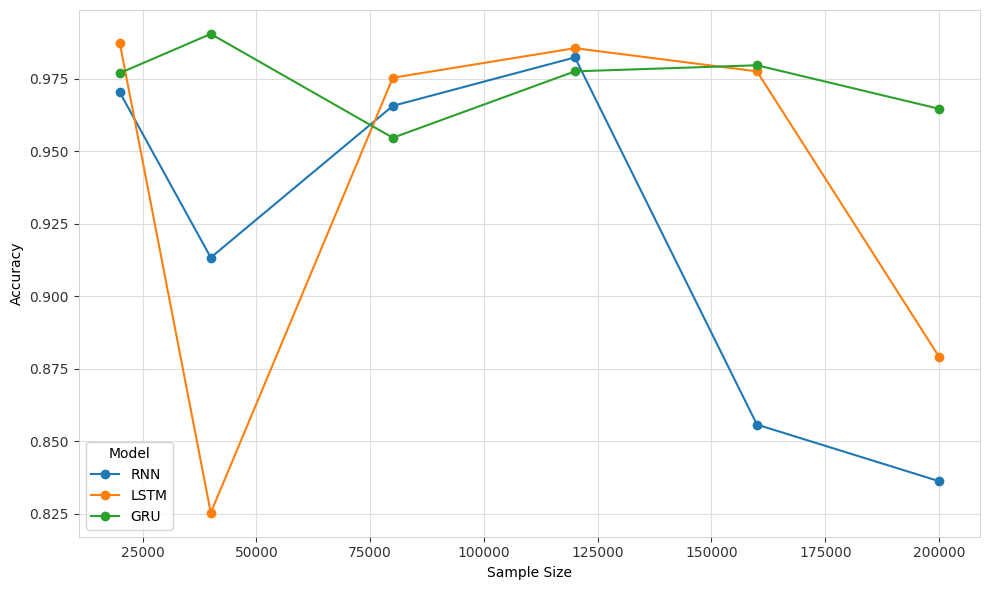

In [ ]:
plt.figure(figsize=(10, 6))

for model in df['Model'].unique():
    model_data = df[df['Model'] == model]
    plt.plot(model_data['Sample Size'], model_data['Accuracy'],
             marker='o', label=model)

# Apply styling AFTER plotting
svg_colors(plt)

#plt.title('Accuracy vs. Sample Size across RNN, LSTM, GRU')
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model')
plt.tight_layout()
plt.savefig("fig8_accuracy_vs_sample_size.svg", format='svg', dpi=300)
plt.show()
plt.close()


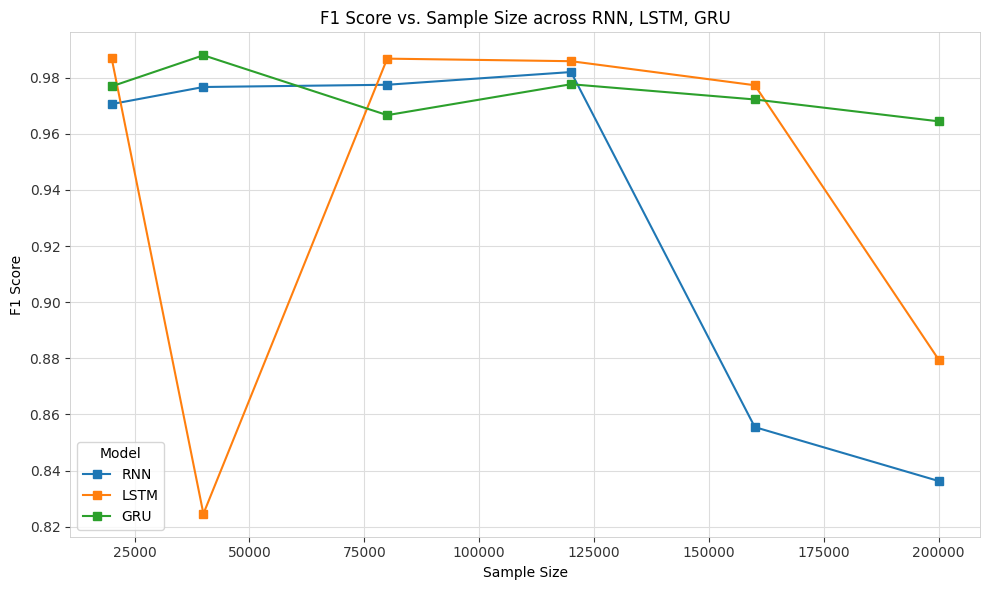

In [ ]:
# STEP 3: Load the Excel file (update if path differs)
file_path = '/content/RNN LSTM GRU results final.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

# STEP 4: Clean and filter for F1 Score plot
df.columns = df.columns.str.strip()
df = df[['Model', 'Sample Size', 'F1 Score']].dropna()
df = df.sort_values(by='Sample Size')

# STEP 5: Plot F1 Score vs Sample Size
plt.figure(figsize=(10, 6))

for model in df['Model'].unique():
    model_data = df[df['Model'] == model]
    plt.plot(model_data['Sample Size'], model_data['F1 Score'],
             marker='s', label=model)

svg_colors(plt)  # Apply consistent SVG style

plt.title('F1 Score vs. Sample Size across RNN, LSTM, GRU')
plt.xlabel('Sample Size')
plt.ylabel('F1 Score')
plt.legend(title='Model')
plt.tight_layout()
plt.savefig("fig9_f1score_vs_sample_size.svg", format='svg', dpi=300)
plt.show()
plt.close()

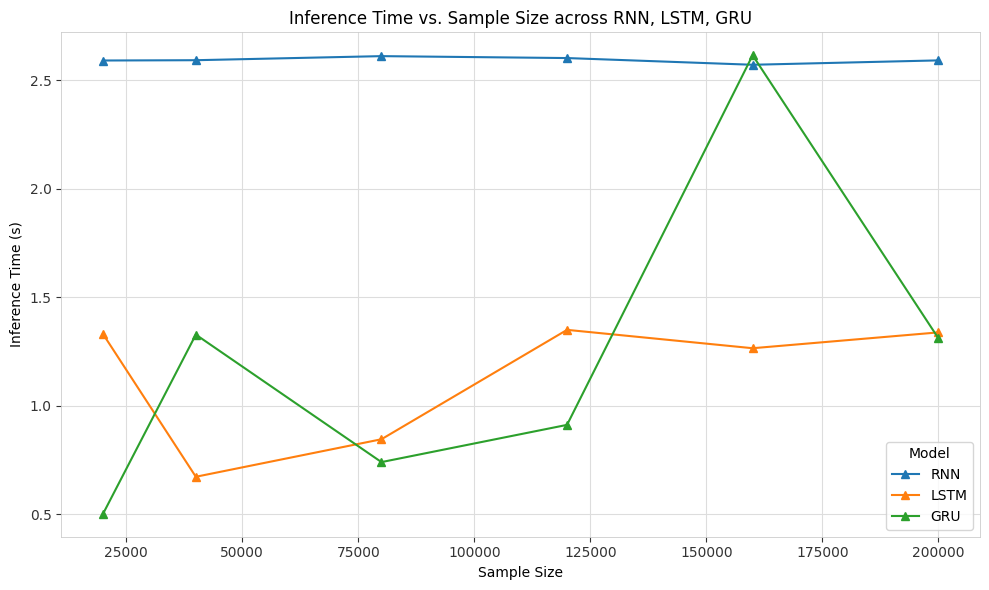

In [ ]:
file_path = '/content/RNN LSTM GRU results final.xlsx'  # adjust if needed
df = pd.read_excel(file_path, sheet_name=0)

# STEP 4: Extract and clean inference time data
df.columns = df.columns.str.strip()
df = df[['Model', 'Sample Size', 'Inference Time (s)']].dropna()
df = df.sort_values(by='Sample Size')

# STEP 5: Plot Inference Time vs. Sample Size
plt.figure(figsize=(10, 6))

for model in df['Model'].unique():
    model_data = df[df['Model'] == model]
    plt.plot(model_data['Sample Size'], model_data['Inference Time (s)'],
             marker='^', label=model)

svg_colors(plt)

plt.title('Inference Time vs. Sample Size across RNN, LSTM, GRU')
plt.xlabel('Sample Size')
plt.ylabel('Inference Time (s)')
plt.legend(title='Model')
plt.tight_layout()
plt.savefig("fig10_inference_time_vs_sample_size.svg", format='svg', dpi=300)
plt.show()
plt.close()

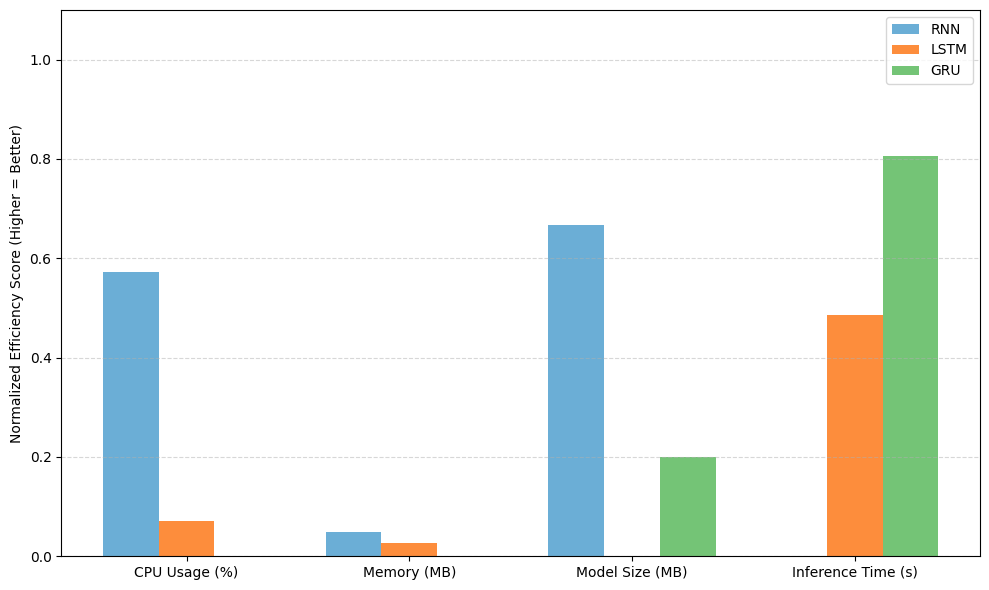

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Original raw values for each model
metrics = ['CPU Usage (%)', 'Memory (MB)', 'Model Size (MB)', 'Inference Time (s)']
rnn_raw = [29.5, 2193.9, 0.15, 2.59]
lstm_raw = [64.2, 2243.3, 0.45, 1.33]
gru_raw = [69.1, 2305.2, 0.36, 0.50]

# Combine all values to normalize
all_values = np.array([rnn_raw, lstm_raw, gru_raw])
max_vals = all_values.max(axis=0)

# Normalize so that all values are in [0, 1]
# Lower is better → we invert: score = 1 - (val / max)
rnn = 1 - np.array(rnn_raw) / max_vals
lstm = 1 - np.array(lstm_raw) / max_vals
gru = 1 - np.array(gru_raw) / max_vals

# X locations
x = np.arange(len(metrics))
width = 0.25

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width, rnn, width, label='RNN', color='#6baed6')
plt.bar(x, lstm, width, label='LSTM', color='#fd8d3c')
plt.bar(x + width, gru, width, label='GRU', color='#74c476')

plt.ylabel('Normalized Efficiency Score (Higher = Better)')
#plt.title('Normalized Resource Efficiency at 20K Sample Size')
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("fig_resource_usage_normalized_20k.svg", format='svg', dpi=300)
plt.show()


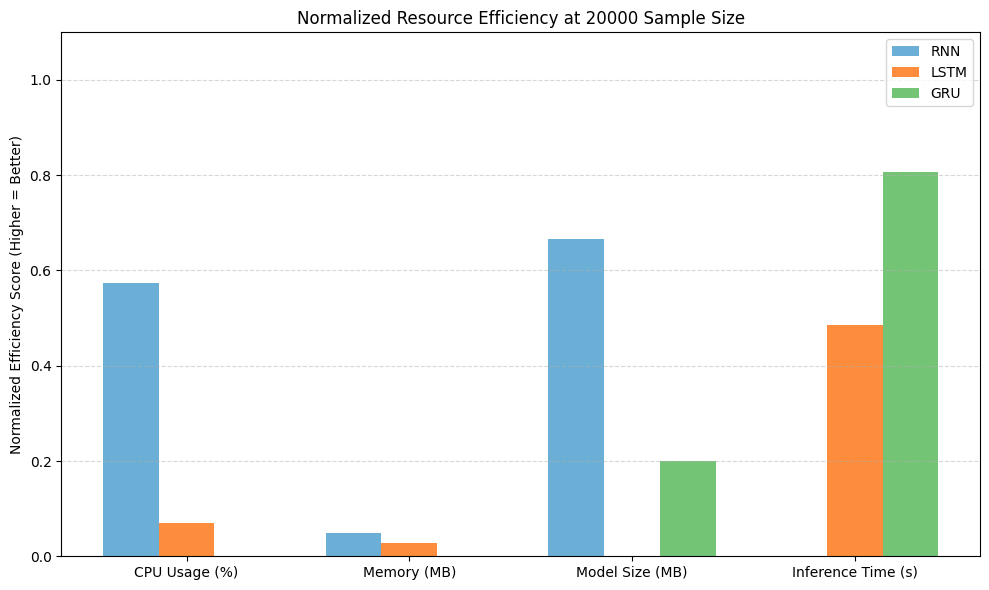

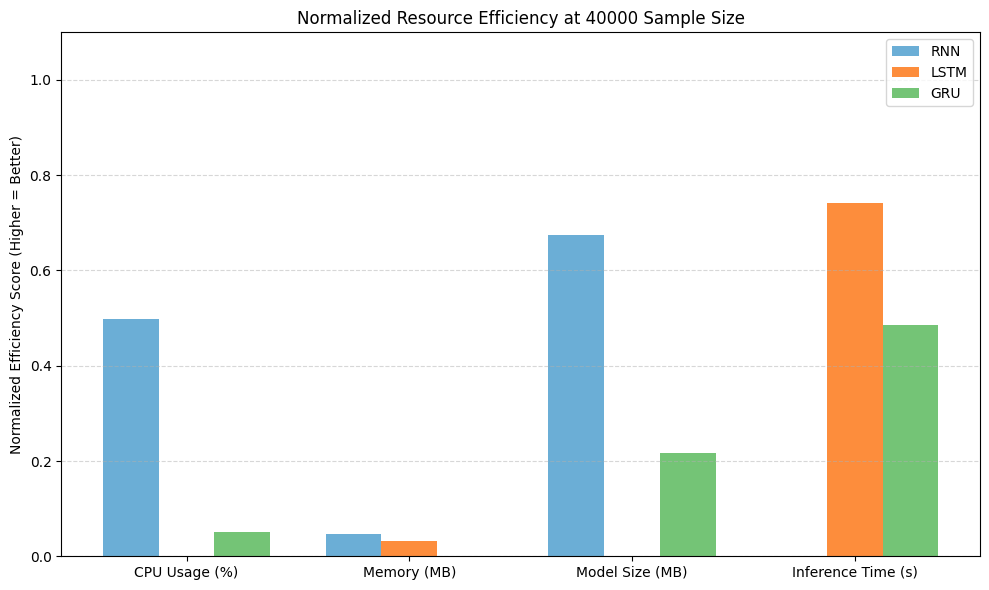

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for all sample sizes
resource_data = {
    '20000': {'RNN': [29.5, 2193.9, 0.15, 2.59],
              'LSTM': [64.2, 2243.3, 0.45, 1.33],
              'GRU': [69.1, 2305.2, 0.36, 0.50]},
    '40000': {'RNN': [34.0, 2341.0, 0.15, 2.59],
              'LSTM': [67.8, 2374.2, 0.46, 0.67],
              'GRU': [64.4, 2454.2, 0.36, 1.33]},
    # Add 80000, 120000, 160000, 200000 similarly...
}

metrics = ['CPU Usage (%)', 'Memory (MB)', 'Model Size (MB)', 'Inference Time (s)']

for size, models in resource_data.items():
    raw = np.array([models['RNN'], models['LSTM'], models['GRU']])
    max_vals = raw.max(axis=0)
    norm_scores = 1 - raw / max_vals

    x = np.arange(len(metrics))
    width = 0.25

    plt.figure(figsize=(10, 6))
    plt.bar(x - width, norm_scores[0], width, label='RNN', color='#6baed6')
    plt.bar(x, norm_scores[1], width, label='LSTM', color='#fd8d3c')
    plt.bar(x + width, norm_scores[2], width, label='GRU', color='#74c476')

    plt.ylabel('Normalized Efficiency Score (Higher = Better)')
    plt.title(f'Normalized Resource Efficiency at {size} Sample Size')
    plt.xticks(x, metrics)
    plt.ylim(0, 1.1)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"fig_resource_usage_normalized_{size}.svg", format='svg', dpi=300)
    plt.show()


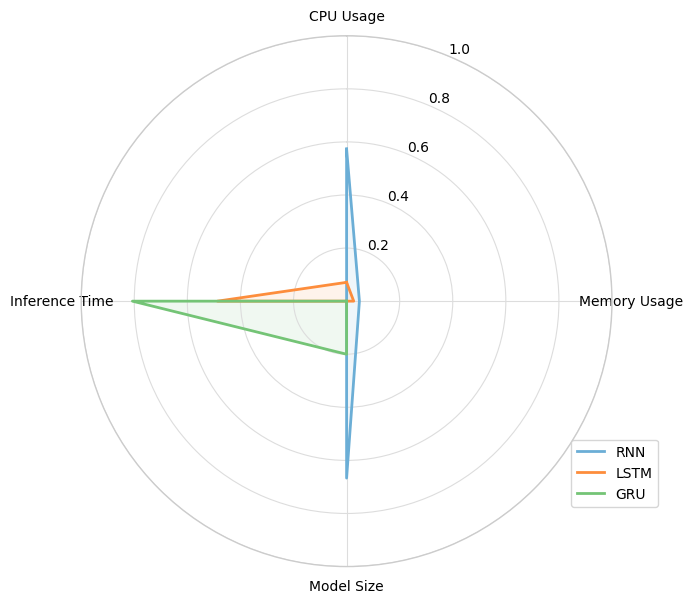

In [ ]:
# STEP 1: Import libraries
import matplotlib.pyplot as plt
import numpy as np

# STEP 2: Define raw resource values for each model at 20K
metrics = ['CPU Usage', 'Memory Usage', 'Model Size', 'Inference Time']
rnn_raw = [29.5, 2193.9, 0.15, 2.59]
lstm_raw = [64.2, 2243.3, 0.45, 1.33]
gru_raw = [69.1, 2305.2, 0.36, 0.50]

# STEP 3: Normalize and invert for efficiency (higher = better)
all_values = np.array([rnn_raw, lstm_raw, gru_raw])
max_vals = all_values.max(axis=0)

rnn = 1 - np.array(rnn_raw) / max_vals
lstm = 1 - np.array(lstm_raw) / max_vals
gru = 1 - np.array(gru_raw) / max_vals

# Close the loop for radar chart
rnn = np.append(rnn, rnn[0])
lstm = np.append(lstm, lstm[0])
gru = np.append(gru, gru[0])
labels = metrics
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# STEP 4: Create radar chart
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

ax.plot(angles, rnn, label='RNN', color='#6baed6', linewidth=2)
ax.fill(angles, rnn, alpha=0.1, color='#6baed6')
ax.plot(angles, lstm, label='LSTM', color='#fd8d3c', linewidth=2)
ax.fill(angles, lstm, alpha=0.1, color='#fd8d3c')
ax.plot(angles, gru, label='GRU', color='#74c476', linewidth=2)
ax.fill(angles, gru, alpha=0.1, color='#74c476')

#ax.set_title("Radar Chart: Normalized Resource Efficiency at 20K Sample Size", size=13, pad=20)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 1)
ax.grid(color='#DDDDDD')
ax.spines['polar'].set_color('#CCCCCC')
ax.spines['polar'].set_linewidth(1)
ax.legend(loc='lower right', bbox_to_anchor=(1.1, 0.1))

plt.tight_layout()
plt.savefig("fig_resource_usage_radar_20k.svg", format='svg', dpi=300)
plt.show()


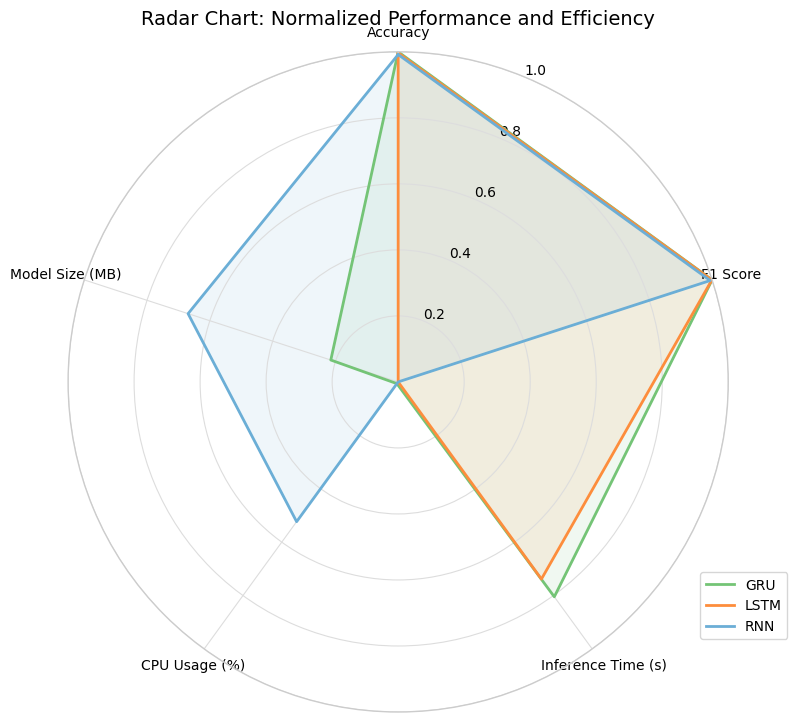

In [ ]:
# STEP 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STEP 2: Load your Excel file (upload it first in Colab)
file_path = '/content/RNN LSTM GRU results final.xlsx'  # Update path if needed
df = pd.read_excel(file_path, sheet_name=0)

# STEP 3: Clean and extract best values for each model
df.columns = df.columns.str.strip()
best_df = df.groupby('Model').agg({
    'Accuracy': 'max',
    'F1 Score': 'max',
    'Inference Time (s)': 'min',
    'CPU Usage (%)': 'min',
    'Model Size (MB)': 'min'
}).reset_index()

# STEP 4: Normalize each column (0 to 1), invert resource columns (lower is better)
normalized = best_df.copy()
normalized[['Accuracy', 'F1 Score']] = best_df[['Accuracy', 'F1 Score']] / best_df[['Accuracy', 'F1 Score']].max()
for col in ['Inference Time (s)', 'CPU Usage (%)', 'Model Size (MB)']:
    normalized[col] = 1 - (best_df[col] / best_df[col].max())

# STEP 5: Prepare radar chart
labels = ['Accuracy', 'F1 Score', 'Inference Time (s)', 'CPU Usage (%)', 'Model Size (MB)']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Close the loop

# Append first value to each model's row to close radar plot
model_scores = {}
for i, row in normalized.iterrows():
    scores = row[labels].tolist()
    scores.append(scores[0])
    model_scores[row['Model']] = scores

# STEP 6: Plot radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
colors = {'RNN': '#6baed6', 'LSTM': '#fd8d3c', 'GRU': '#74c476'}

for model, values in model_scores.items():
    ax.plot(angles, values, label=model, color=colors[model], linewidth=2)
    ax.fill(angles, values, alpha=0.1, color=colors[model])

ax.set_title("Radar Chart: Normalized Performance and Efficiency", size=14, pad=20)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 1)
ax.grid(color='#DDDDDD')
ax.spines['polar'].set_color('#CCCCCC')
ax.spines['polar'].set_linewidth(1)
ax.legend(loc='lower right', bbox_to_anchor=(1.1, 0.1))

plt.tight_layout()
plt.savefig("fig_radar_overall_normalized.svg", format='svg', dpi=300)
plt.show()


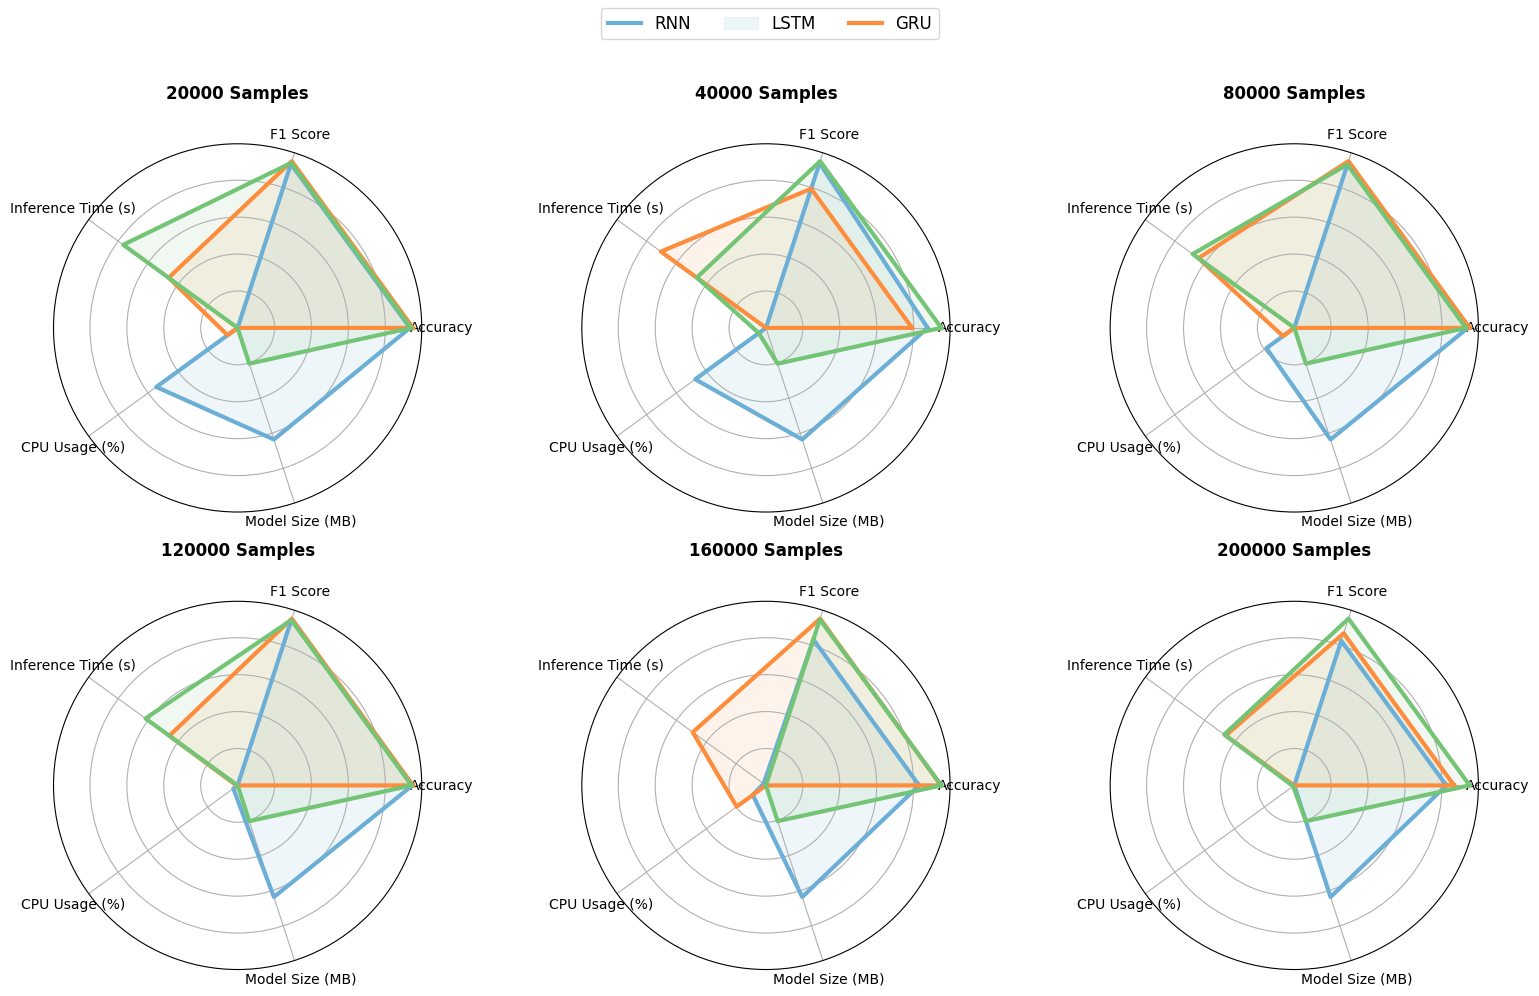

In [ ]:
# STEP 1: Install dependencies (Colab usually has these by default)
!pip install openpyxl --quiet

# STEP 2: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/RNN LSTM GRU results final.xlsx'  # Update path if needed

# STEP 4: Load the Excel data

df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()  # clean column names

# STEP 5: Extract numeric sample size
df['Sample Size'] = df['Dataset'].str.extract(r'(\d+)').astype(int)

# STEP 6: Filter and organize necessary columns
metrics = ['Accuracy', 'F1 Score', 'Inference Time (s)', 'CPU Usage (%)', 'Model Size (MB)']
df = df[['Sample Size', 'Model'] + metrics]

# STEP 7: Normalize each metric per Sample Size
normalized_list = []

for size in sorted(df['Sample Size'].unique()):
    subset = df[df['Sample Size'] == size].copy()
    # Normalize performance metrics (higher is better)
    subset[['Accuracy', 'F1 Score']] = subset[['Accuracy', 'F1 Score']] / subset[['Accuracy', 'F1 Score']].max()
    # Normalize resource metrics (lower is better → 1 - normalized)
    for col in ['Inference Time (s)', 'CPU Usage (%)', 'Model Size (MB)']:
        subset[col] = 1 - (subset[col] / subset[col].max())
    normalized_list.append(subset)

normalized_df = pd.concat(normalized_list)

# STEP 8: Prepare radar chart structure
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # close loop
models = ['RNN', 'LSTM', 'GRU']
colors = {'RNN': '#6baed6', 'LSTM': '#fd8d3c', 'GRU': '#74c476'}

# STEP 9: Plot radar charts in 2x3 layout
fig, axes = plt.subplots(2, 3, figsize=(16, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()

for idx, size in enumerate(sorted(df['Sample Size'].unique())):
    ax = axes[idx]
    subset = normalized_df[normalized_df['Sample Size'] == size]

    for model in models:
        row = subset[subset['Model'] == model].iloc[0]
        values = row[metrics].tolist()
        values += values[:1]  # close radar line
        scaled_values = [v * 0.95 for v in values]  # scale down to move inward
        ax.plot(angles, scaled_values, label=model, color=colors[model], linewidth=3)
        ax.fill(angles, scaled_values, alpha=0.1, color=colors[model])

    ax.set_title(f'{size} Samples', size=12, weight='bold', y=1.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    ax.set_yticklabels([])
    ax.grid(True)

# STEP 10: Final formatting
fig.legend(models, loc='upper center', ncol=3, fontsize=12)
#plt.suptitle('Radar Charts: Normalized Performance & Efficiency by Sample Size', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig("fig_radar_all_datasets.svg", format='svg', dpi=300)
plt.show()


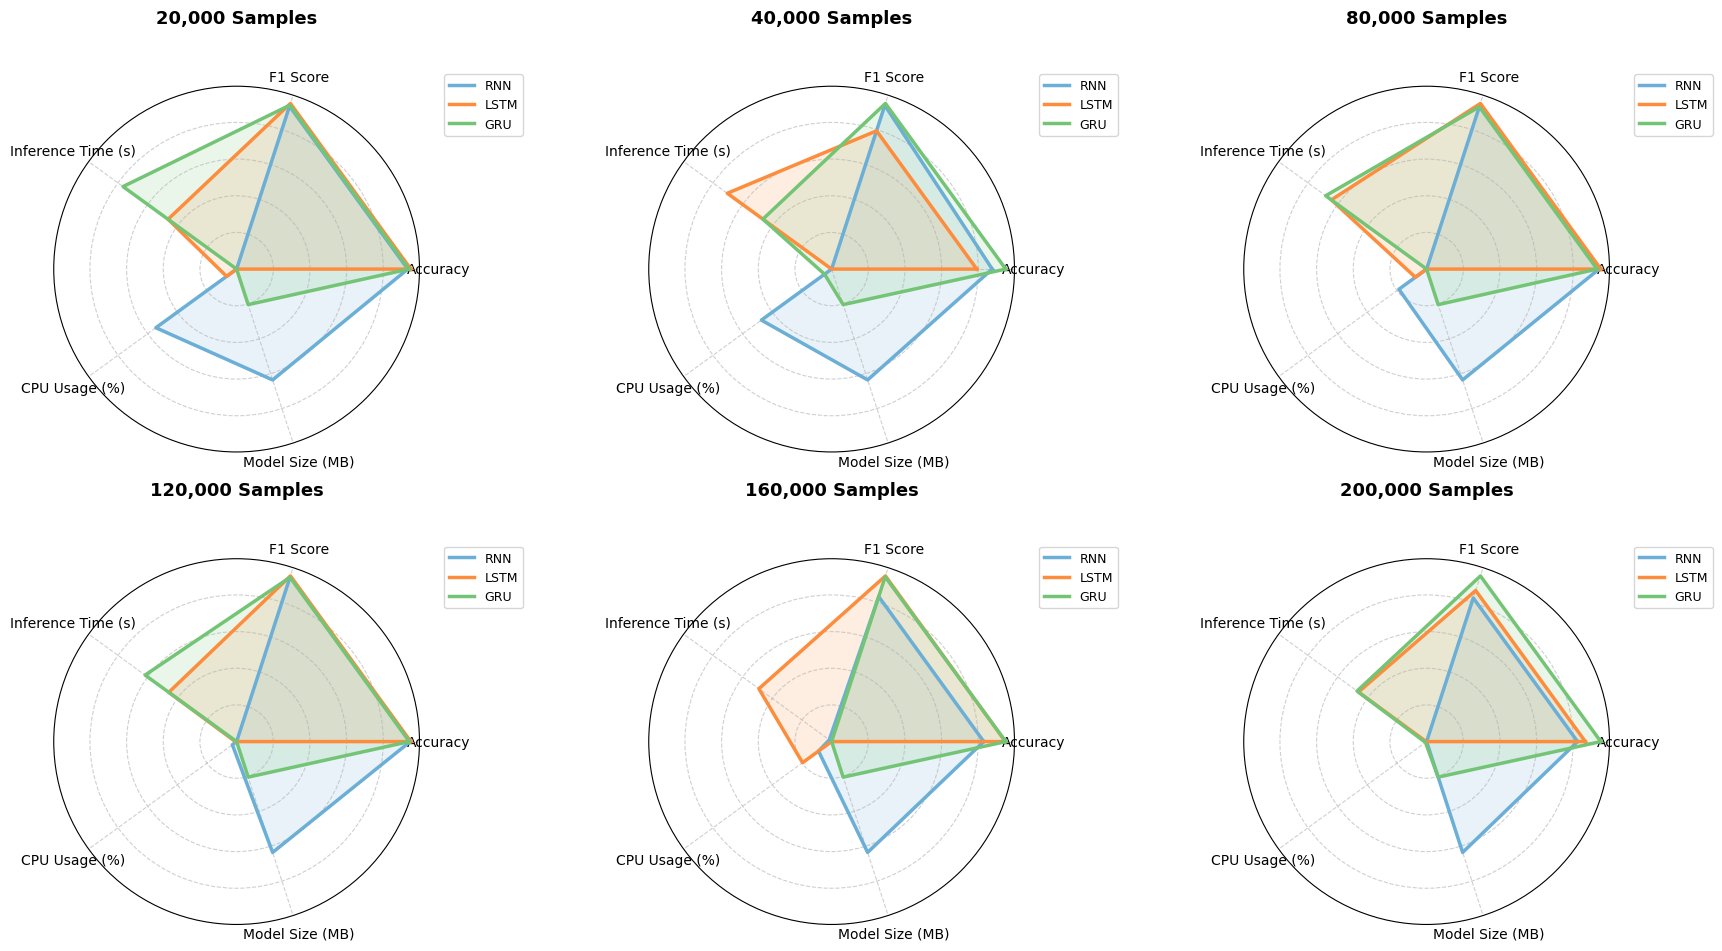

In [4]:
# STEP 1: Install dependency (quiet mode)
!pip install openpyxl --quiet

# STEP 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# STEP 3: Load Excel data
file_path = '/content/RNN LSTM GRU results final.xlsx'  # Update if needed
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()  # Clean column names

# STEP 4: Extract sample size from Dataset name
df['Sample Size'] = df['Dataset'].str.extract(r'(\d+)')[0].dropna().astype(int)

# STEP 5: Define metrics to include
metrics = ['Accuracy', 'F1 Score', 'Inference Time (s)', 'CPU Usage (%)', 'Model Size (MB)']
df = df[['Sample Size', 'Model'] + metrics]

# STEP 6: Normalize metrics per sample size
normalized_list = []
for size in sorted(df['Sample Size'].unique()):
    subset = df[df['Sample Size'] == size].copy()
    # Normalize performance metrics (higher is better)
    subset[['Accuracy', 'F1 Score']] = subset[['Accuracy', 'F1 Score']] / subset[['Accuracy', 'F1 Score']].max()
    # Normalize resource metrics (lower is better)
    for col in ['Inference Time (s)', 'CPU Usage (%)', 'Model Size (MB)']:
        subset[col] = 1 - (subset[col] / subset[col].max())
    normalized_list.append(subset)

normalized_df = pd.concat(normalized_list)

# STEP 7: Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]
models = ['RNN', 'LSTM', 'GRU']
colors = {'RNN': '#6baed6', 'LSTM': '#fd8d3c', 'GRU': '#74c476'}

# STEP 8: Create radar charts
fig, axes = plt.subplots(2, 3, figsize=(18, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()

for idx, size in enumerate(sorted(df['Sample Size'].unique())):
    ax = axes[idx]
    subset = normalized_df[normalized_df['Sample Size'] == size]
    ax.set_title(f'{size:,} Samples', size=13, weight='bold', y=1.15)

    for model in models:
        row = subset[subset['Model'] == model]
        if not row.empty:
            values = row[metrics].values.flatten().tolist()
            values += values[:1]
            scaled_values = [v * 0.95 for v in values]  # Scale inward
            ax.plot(angles, scaled_values, label=model, color=colors[model], linewidth=2.5)
            ax.fill(angles, scaled_values, alpha=0.15, color=colors[model])

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=10)
    ax.set_yticklabels([])
    ax.grid(True, linestyle='dashed', alpha=0.6)

    # Optional: individual legend per subplot
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05), fontsize=9)

# STEP 9: Final formatting
plt.tight_layout(rect=[0, 0, 1, 0.96])
#fig.suptitle('Radar Charts: Normalized Performance and Efficiency per Sample Size', fontsize=16, weight='bold')
plt.savefig("/content/fig_radar_all_datasets.svg", format='svg', dpi=300)
plt.show()
